# Breast Cancer Data Machine Learning & Analysis

In this notebook, we will be using the Breast Cancer Wisconsin (Diagnostic) Data Set obtained from UCI Machine Learning Repository. (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

This dataset contains biopsy features for classification of 569 malignant and benign breast masses.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("Solarize_Light2")

In [2]:
brca = pd.read_csv("brca.csv", index_col=[0])
brca.y = brca.y.apply(lambda x: 0 if x=='B' else 1)
brca.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,y
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [3]:
brca.shape

(569, 31)

# EDA

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

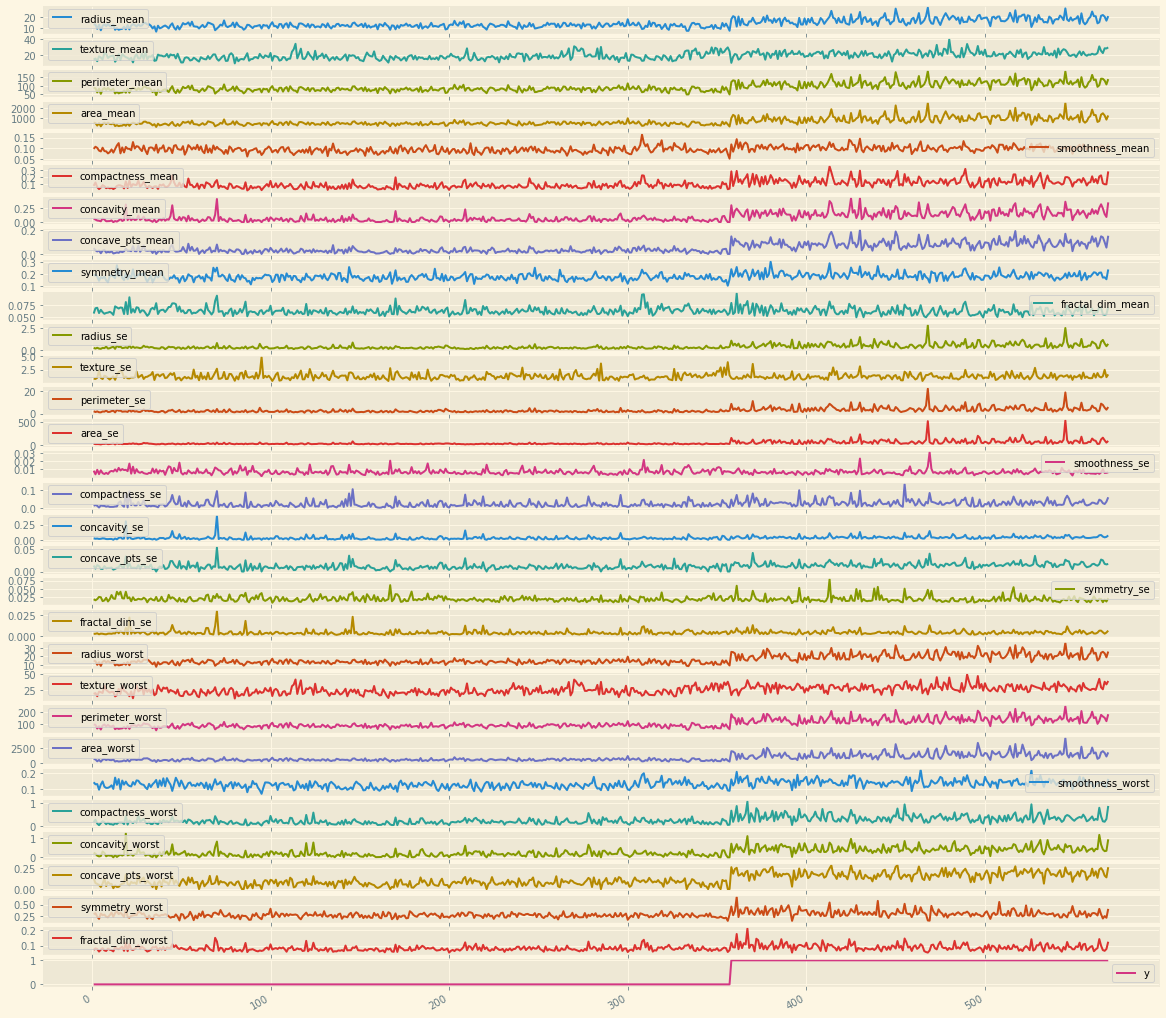

In [4]:
brca.plot(subplots=True, figsize=(20,20))

We observe that there's a higher variation in all features associated with a malignant status.

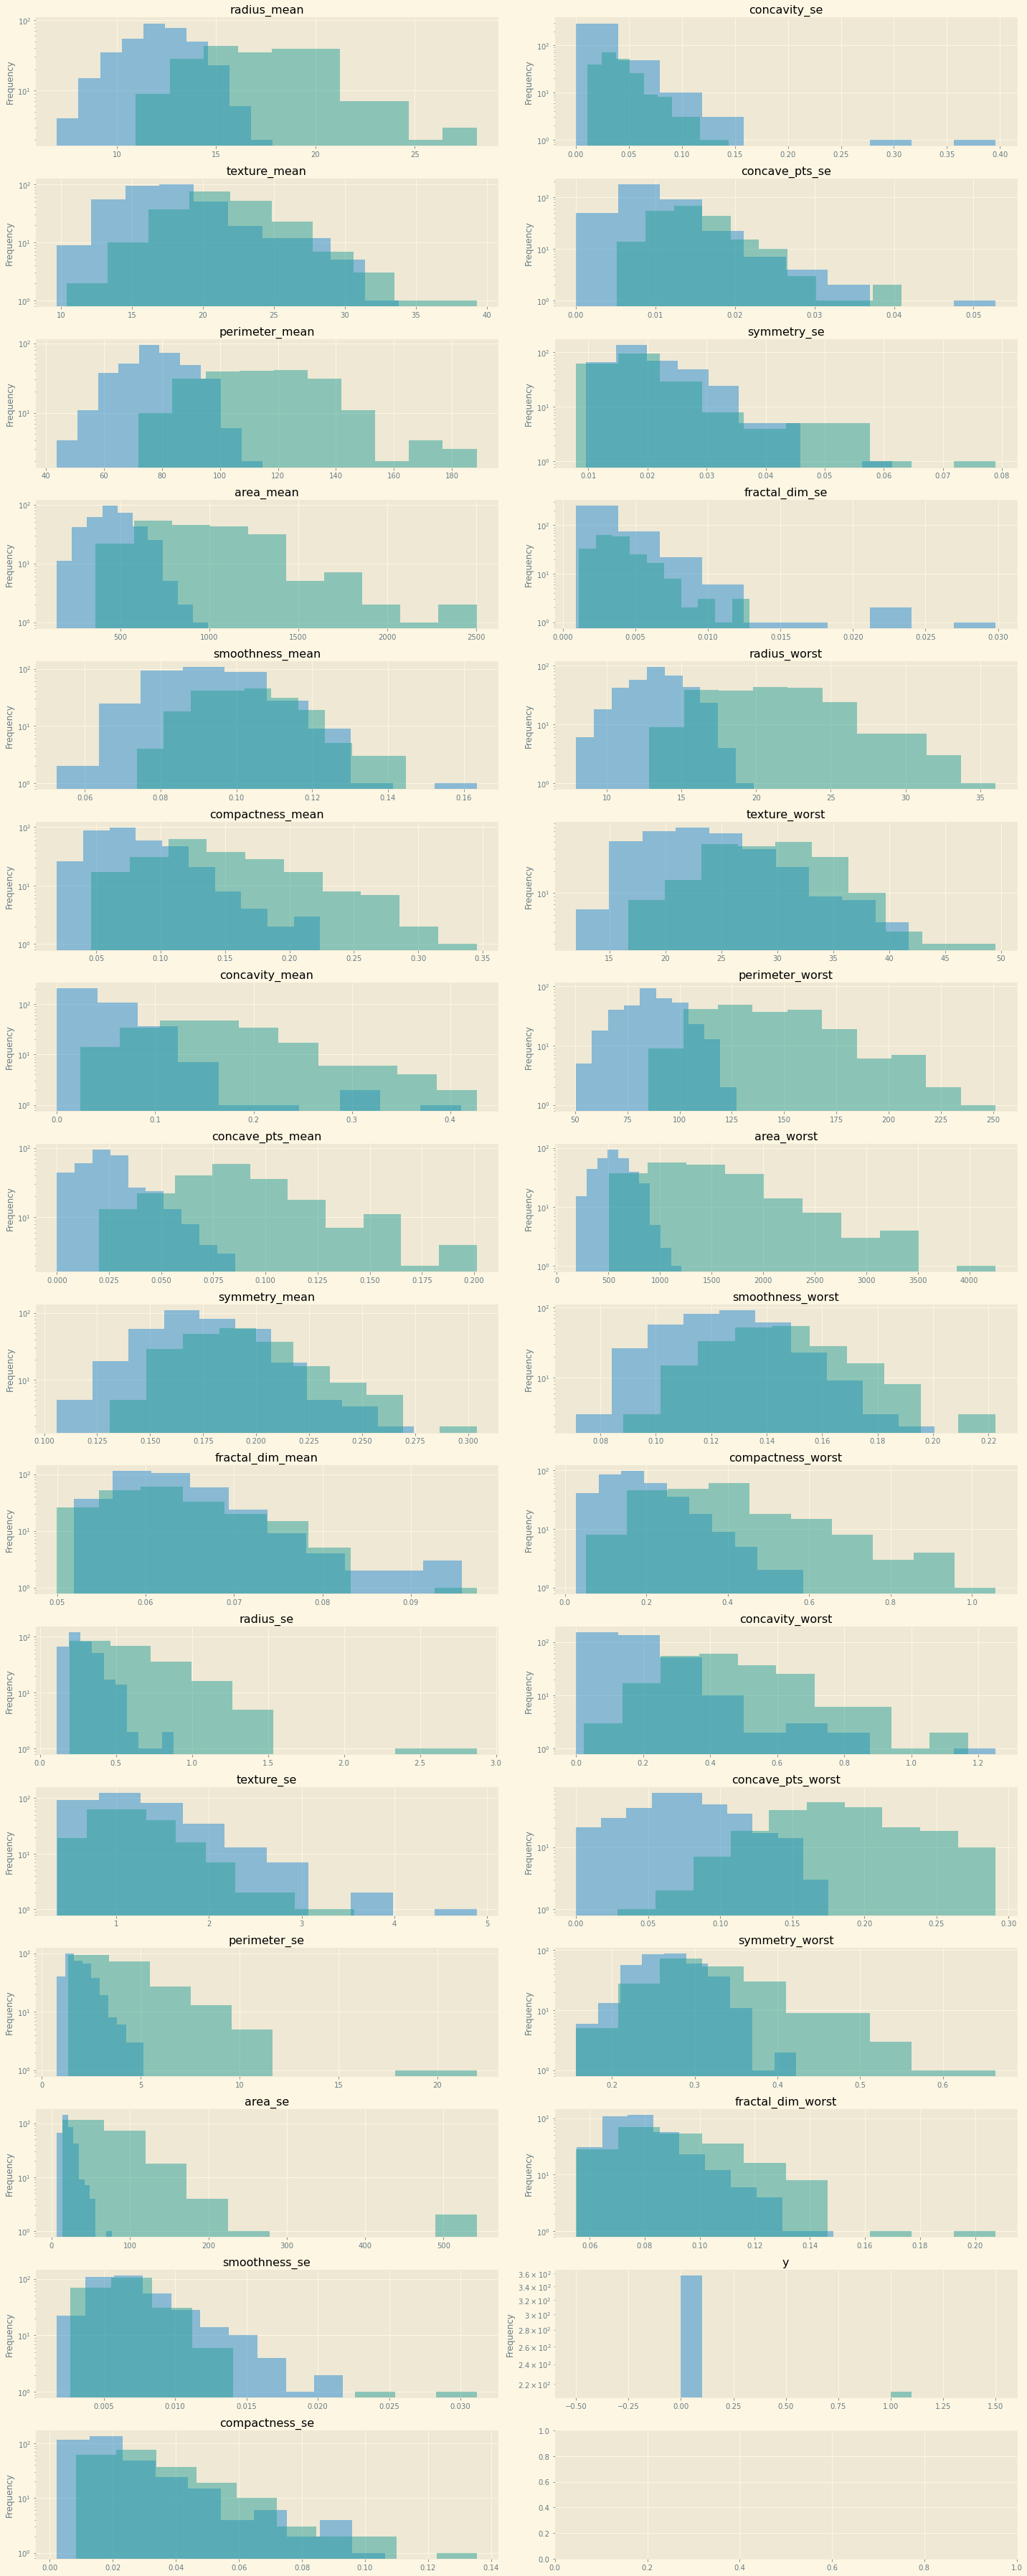

In [5]:
fig, axs = plt.subplots(16, 2, figsize=(20,50))

for i, col in enumerate(brca):
    brca.loc[brca.y==0, col].plot.hist(alpha=0.5, logy=True, ax=axs[i%16][i//16], title=col)
    brca.loc[brca.y==1, col].plot.hist(alpha=0.5, logy=True, ax=axs[i%16][i//16], title=col)
    
plt.tight_layout()

In [6]:
brca.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
from sklearn.feature_selection import mutual_info_classif as mi

mi_ar = mi(brca.drop('y', axis=1), brca.y)

miscores = pd.DataFrame(mi_ar, index=brca.columns.drop('y'), columns=['MI Score'])
miscores

,MI Score
radius_mean,0.362564
texture_mean,0.096213
perimeter_mean,0.402045
area_mean,0.360997
smoothness_mean,0.075709
compactness_mean,0.213623
concavity_mean,0.372427
concave_pts_mean,0.439974
symmetry_mean,0.055548
fractal_dim_mean,0.009613


# Machine Learning

In [200]:
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [144]:
features = miscores[miscores>0].dropna().index
kf = StratifiedKFold(n_splits = 5)
oversample = SMOTE()
X = brca[features]
y = brca.y

In [155]:
def evaluate(X, y, upsamp=False, display_pvals=False):
    accuracies = []
    aics = []
    cms = []
    rs = []
    pvals = []
    for idx in kf.split(X=X, y=y):
        train_idx, test_idx = idx[0], idx[1]
        X_train, y_train, X_test, y_test = X.iloc[train_idx], y.iloc[train_idx], X.iloc[test_idx], y.iloc[test_idx]        
        if upsamp: X_train, y_train = oversample.fit_resample(X_train, y_train)
        mod = sm.OLS(y_train, X_train)
        res = mod.fit()
        aics.append(res.aic)
        rs.append(res.rsquared)        
        y_hat = res.predict(X_test).apply(lambda x: 1 if x>=0.5 else 0)        
        accuracies.append(accuracy_score(y_test, y_hat))
        cms.append(confusion_matrix(y_test, y_hat))
        pvals.append(res.pvalues)
    print('mean accuracy:', sum(accuracies)/len(accuracies))
    print('mean aic:', sum(aics)/len(aics))
    print('confusion matricies')
    for cm in cms: print(cm)
    print('mean rsquared')
    print(sum(rs)/len(rs))
    if display_pvals: print(pvals)
    return pvals

In [146]:
res = evaluate(X, y, False)

mean accuracy: 0.9525694767893185
mean aic: 23.38957052507444
confusion matricies
[[71  1]
 [ 7 35]]
[[72  0]
 [ 4 38]]
[[71  0]
 [ 6 37]]
[[71  0]
 [ 5 38]]
[[71  0]
 [ 4 38]]
mean rsquared
0.8549463646884978


Let's see if we can do better by choosing only features which have a mutual information score of above 0.1

In [147]:
features = miscores[miscores>0.1].dropna().index
X1 = brca[features]
y = brca.y

In [150]:
res = evaluate(X1, y, False)

mean accuracy: 0.9437820214252446
mean aic: 31.21959918303155
confusion matricies
[[71  1]
 [ 7 35]]
[[72  0]
 [ 5 37]]
[[71  0]
 [ 8 35]]
[[71  0]
 [ 6 37]]
[[71  0]
 [ 5 37]]
mean rsquared
0.8444825235637874


It doesn't appear so, let's improve on our initial model

In [152]:
res = evaluate(X, y, upsamp=True)

mean accuracy: 0.9596180717279925
mean aic: 44.572666369484935
confusion matricies
[[70  2]
 [ 3 39]]
[[72  0]
 [ 3 39]]
[[70  1]
 [ 6 37]]
[[70  1]
 [ 5 38]]
[[70  1]
 [ 1 41]]
mean rsquared
0.8859786476504047


Observe that we have reduced the false negatives from 26 to 18 by performing SMOTE upsampling

In [156]:
res = evaluate(X, y, upsamp=True, display_pvals=True)

mean accuracy: 0.9613724576929048
mean aic: 41.37485205888252
confusion matricies
[[70  2]
 [ 4 38]]
[[72  0]
 [ 3 39]]
[[71  0]
 [ 5 38]]
[[70  1]
 [ 5 38]]
[[70  1]
 [ 1 41]]
mean rsquared
0.8865345469523536
[radius_mean          3.971600e-01
texture_mean         2.916950e-01
perimeter_mean       6.896877e-01
area_mean            5.230282e-02
smoothness_mean      6.677776e-01
compactness_mean     5.817155e-01
concavity_mean       2.767229e-01
concave_pts_mean     8.721127e-02
symmetry_mean        5.147620e-01
fractal_dim_mean     4.025975e-10
radius_se            8.193317e-01
texture_se           5.819588e-01
perimeter_se         4.223012e-01
area_se              1.481596e-01
smoothness_se        2.496370e-03
compactness_se       9.585341e-01
concavity_se         7.165701e-02
concave_pts_se       4.182441e-01
symmetry_se          2.676418e-02
fractal_dim_se       4.253689e-01
radius_worst         2.850072e-06
texture_worst        3.822123e-02
perimeter_worst      6.497509e-01
area_wo

In [182]:
rel_features = []
for feature_tab in [res[i][(np.array(res)<0.05)[i]].index for i in range(len(res))]:
    for feature in feature_tab:
        if feature not in rel_features: rel_features.append(feature)

In [188]:
X_res = X[rel_features]
res2 = evaluate(X_res, y, upsamp=True)

mean accuracy: 0.9613724576929048
mean aic: 25.633005383395403
confusion matricies
[[70  2]
 [ 3 39]]
[[71  1]
 [ 3 39]]
[[71  0]
 [ 5 38]]
[[69  2]
 [ 4 39]]
[[70  1]
 [ 1 41]]
mean rsquared
0.8844232370585363


Again, we have reduced the false negatives from 18 to 14.  
Let's fit our final model.

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y, train_size=0.8, stratify=y, random_state=42)
res_X_train, res_y_train = oversample.fit_resample(X_train, y_train)
mod = sm.OLS(res_y_train, res_X_train)
res = mod.fit()
y_hat = res.predict(X_test).apply(lambda x: 0 if x<0.5 else 1)
print(res.summary())
print('\n\naccuracy:', accuracy_score(y_test, y_hat))
print('confusion matrix:\n', confusion_matrix(y_test, y_hat))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              242.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):                   3.05e-243
Time:                        13:52:29   Log-Likelihood:                         -2.9016
No. Observations:                 570   AIC:                                      39.80
Df Residuals:                     553   BIC:                                      113.7
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------